# STUDENTS PERFORMANCE IN EXAMS: 
### EXPLORING CORRELATION + PPSCORE PACKAGE REVIEW

This is a [Kaggle task inspired notebook](https://www.kaggle.com/spscientist/students-performance-in-exams/tasks?taskId=280).

Main objective is to figure out if a correlation exists between the different attributes that are in the dataset. Working both with continuous and categorical variables.

To add a little more mystery the PPS package is also tested in this notebook. The PPS describes itself as an alternative to the correlation able to find more patterns in the data. I heard about this package in this [post](https://8080labs.com/blog/posts/rip-correlation-introducing-the-predictive-power-score-pps/).

In [2]:
# Import necessary libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import *
%matplotlib inline
import ppscore as ppscore

In [3]:
data=pd.read_csv('./input/StudentsPerformance.csv')
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


There is no null values in any variable, so by the moment no prior processing will take place.

Fields in detail:

In [5]:
for feature in data.columns:
    uniq = np.unique(data[feature])
    print('{}: {} distinct values -  {}'.format(feature,len(uniq),uniq))

gender: 2 distinct values -  ['female' 'male']
race/ethnicity: 5 distinct values -  ['group A' 'group B' 'group C' 'group D' 'group E']
parental level of education: 6 distinct values -  ["associate's degree" "bachelor's degree" 'high school' "master's degree"
 'some college' 'some high school']
lunch: 2 distinct values -  ['free/reduced' 'standard']
test preparation course: 2 distinct values -  ['completed' 'none']
math score: 81 distinct values -  [  0   8  18  19  22  23  24  26  27  28  29  30  32  33  34  35  36  37
  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55
  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73
  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91
  92  93  94  95  96  97  98  99 100]
reading score: 72 distinct values -  [ 17  23  24  26  28  29  31  32  34  37  38  39  40  41  42  43  44  45
  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63
  64  65  66  67  68  69  70  71  

### INDEX

* 1. [Correlation with Original Data](#first-bullet)
* 2. [Correlation encoding categorical variables](#second-bullet)
    * 2.1. [Label Encoding](#label-encoding) 
        * 2.1.1. [Gender Influence](#gender-influence)
        * 2.2.2. [Race/Ethnicity Influence](#race-ethnicity-influence)
        * 2.2.3. [Test Preparation Influence](#test-preparation-influence)
        * 2.2.4. [Lunch Plan Influence](#lunch-plan-influence)
    * 2.2. [One-Hot Encoding](#one-hot-encoding)
        * 2.2.1. [Broken Down Race/Ethnicity](#broken-down-race-ethnicity)
        * 2.2.2. [Broken Down Parental Education](#broken-down-parental-education)
* 3. [Bonus: Testing PPSCORE package](#third-bullet)
* 4. [Conclusions](#fourth-bullet)


# 1. Correlation with Original Data <a class="anchor" id="first-bullet"></a>

We will use the Pandas function *dataframe.corr()* to find the correlation between numeric variables only. 
The return of this function give us a score ranging from -1 to 1 that indicates if there is a strong linear relationship in a positive or negative direction.

In [6]:
corr = data.corr()
print(corr)

               math score  reading score  writing score
math score       1.000000       0.817580       0.802642
reading score    0.817580       1.000000       0.954598
writing score    0.802642       0.954598       1.000000


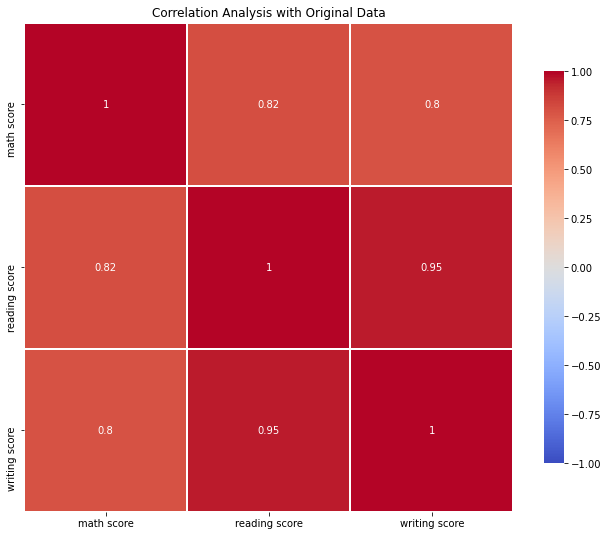

In [7]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
plt.title('Correlation Analysis with Original Data')
# Draw the heatmap with the mask and correct aspect ratio
ca = sns.heatmap(corr, cmap='coolwarm',center=0, vmin = -1,
            square=True, linewidths=1, cbar_kws={"shrink": .8}, annot = True)

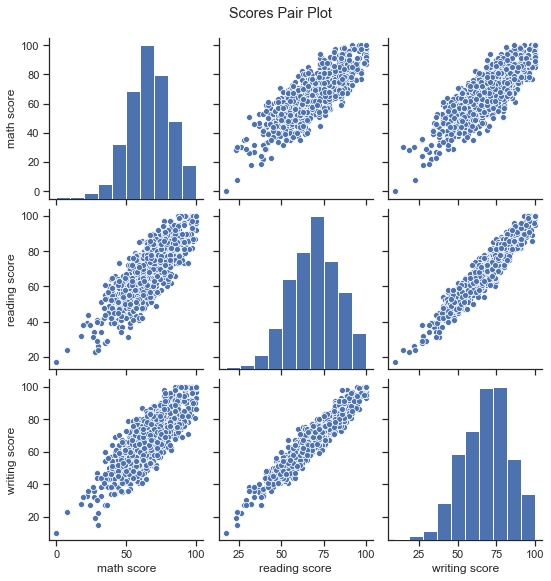

In [8]:
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(data, palette="coolwarm")
title = g.fig.suptitle("Scores Pair Plot", y = 1.05)

Looking at the scores and the graphs we can say that the three scores are highly related, students who do well in one subject are more likely to do well in the other subjects.

**Math, reading and writing score are have a strong positive linear relationship.**

# 2. Working with categorical variables <a class="anchor" id="second-bullet"></a>

We are going to explore two options here: label encoding and one-hot encoding.

## 2.1 Label Encoding <a class="anchor" id="label-encoding"></a>

This approach consists in converting each value in a column to a number: in column *Lunch* 'standard' will be represented by a 1 and 'free/reduced' by a 0.

In [9]:
data_label_encoding = data.copy()

In [10]:
# converting type of columns to 'category'
data_label_encoding['gender']= data_label_encoding['gender'].astype('category')
data_label_encoding['race/ethnicity']= data_label_encoding['race/ethnicity'].astype('category')
data_label_encoding['parental level of education']= data_label_encoding['parental level of education'].astype('category')
data_label_encoding['lunch']= data_label_encoding['lunch'].astype('category')
data_label_encoding['test preparation course']= data_label_encoding['test preparation course'].astype('category')

In [11]:
# Assigning numerical values and storing in another column
data_label_encoding['gender_cat']= data_label_encoding['gender'].cat.codes
data_label_encoding['race/ethnicity_cat']= data_label_encoding['race/ethnicity'].cat.codes
data_label_encoding['parental level of education_cat']= data_label_encoding['parental level of education'].cat.codes
data_label_encoding['lunch_cat']= data_label_encoding['lunch'].cat.codes
data_label_encoding['test preparation course_cat']= data_label_encoding['test preparation course'].cat.codes

Another option to encode labels is to use the LabelEncoder function from sklearn.

As we can see in the info() we have created the "cat" variable associated to categorical variable:

In [12]:
data_label_encoding.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   gender                           1000 non-null   category
 1   race/ethnicity                   1000 non-null   category
 2   parental level of education      1000 non-null   category
 3   lunch                            1000 non-null   category
 4   test preparation course          1000 non-null   category
 5   math score                       1000 non-null   int64   
 6   reading score                    1000 non-null   int64   
 7   writing score                    1000 non-null   int64   
 8   gender_cat                       1000 non-null   int8    
 9   race/ethnicity_cat               1000 non-null   int8    
 10  parental level of education_cat  1000 non-null   int8    
 11  lunch_cat                        1000 non-null   int8    
 12  test pr

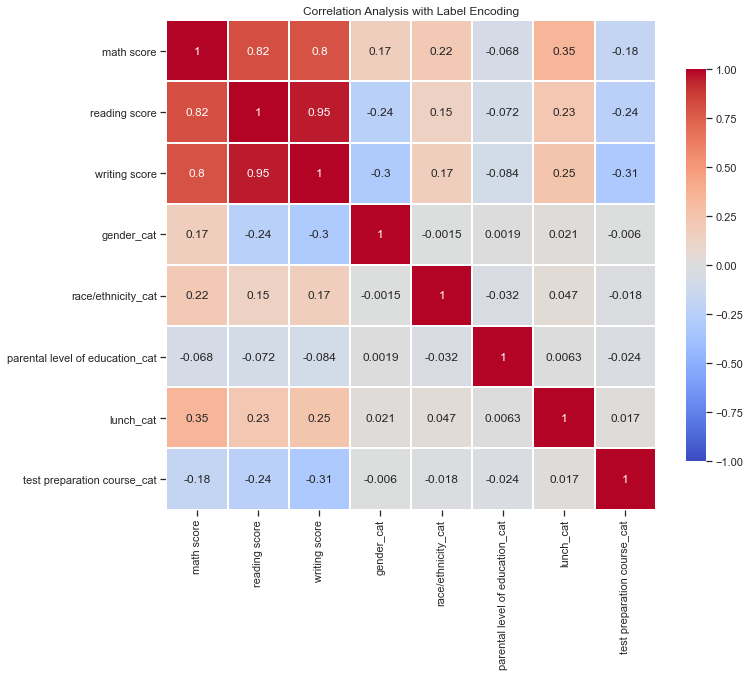

In [13]:
corr_label_encoding = data_label_encoding.corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
plt.title('Correlation Analysis with Label Encoding')
# Draw the heatmap with the mask and correct aspect ratio
ca = sns.heatmap(corr_label_encoding, cmap='coolwarm',center=0, vmin = -1,
            square=True, linewidths=1, cbar_kws={"shrink": .8}, annot = True)

Label encoding has one great disadvantage: the numeric values may be misinterpreted by algorithms as having some kind of order. If gender / race category assinged group A, B, C, D and E to values 0, 1, 2, 3 and 4 respectively it may be assumed by the algorithm that somehow group E is hierarchically greater than group A.

By observing the correlation table it would be interesting to explore deeply how 'gender', 'race/ehtnicity', 'lunch' and 'test preparation course' influence our three scores: math, reading and writing. We will leave out 'parental level of education' as its correlation levels seem to be negligible. 

### 2.1.1. Gender Influence <a class="anchor" id="gender-influence"></a>

In [14]:
dt_tmp = data_label_encoding[['math score', 'reading score', 'writing score', 'gender']]
dt_tmp = dt_tmp.melt(id_vars = ['gender'])

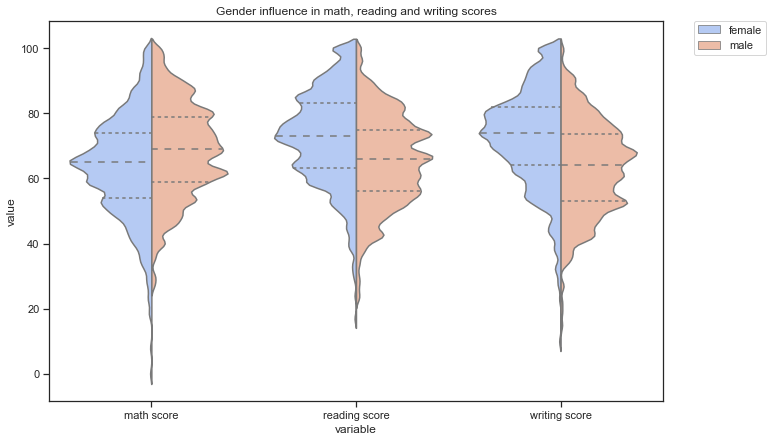

In [15]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 7))
plt.title('Gender influence in math, reading and writing scores')
violin_gender = sns.violinplot(x="variable", y="value", hue="gender",
                     data=dt_tmp, palette="coolwarm", split=True,
                     scale="count", inner="quartile", bw=.1)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

If we go back to the correlation table we can observe that math score has a slight positive correlation with gender, whereas reading and writing have a slight negative one.
 
This can be easily explained due to label encoding: 0 represents female and 1 male. Math Score has a positive linear relationship with gender as female gender (0 in encoding) tend to score less in maths than male gender (1 in encoding). For reading and writing is the other way around, female gender tend to have better scores. This effect is clearer in writing score, where female gender has clearly a higher median and 25 and 75 quantiles' values.

### 2.1.2.  Race/Ethnicity  Influence<a class="anchor" id="race-ethnicity-influence"></a>

In [16]:
dt_tmp = data_label_encoding[['math score', 'reading score', 'writing score', 'race/ethnicity']]
dt_tmp = dt_tmp.melt(id_vars = ['race/ethnicity'])

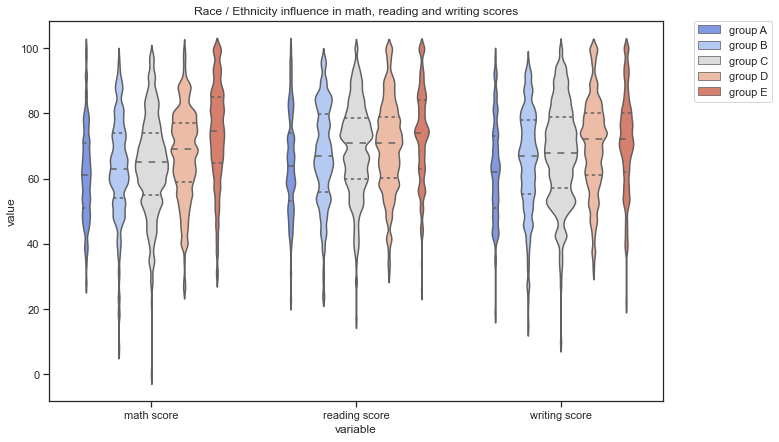

In [17]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 7))
plt.title('Race / Ethnicity influence in math, reading and writing scores')
violin_gender = sns.violinplot(x="variable", y="value", hue="race/ethnicity",
                     data=dt_tmp, palette="coolwarm", 
                     scale="count", inner="quartile", bw=.1)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

We found ourselves in quite a similar position as in gender influence study. Values associated to groups A, B, C, D and E are 0, 1, 2, 3 and 4 respectively, and as D and E groups tend to score a little bit better, race/ethnicity shows a slight positive relation in the correlation matrix (0.22, 0.15, 0.17). 

If we dig deeper, we can easily realize that for each scoring, there's no difference among some groups. For example, attending to math scoring we could say that there's almost no variation among groups A, B and C, and same pattern is reflected in writing score. In fact, we could say that group E represent the main influence on all three outcomes followed by group D: they tend to score better.

### 2.1.3. Test Preparation Influence <a class="anchor" id="test-preparation-influence"></a>

In [18]:
dt_tmp = data_label_encoding[['math score', 'reading score', 'writing score', 'test preparation course']]
dt_tmp = dt_tmp.melt(id_vars = ['test preparation course'])

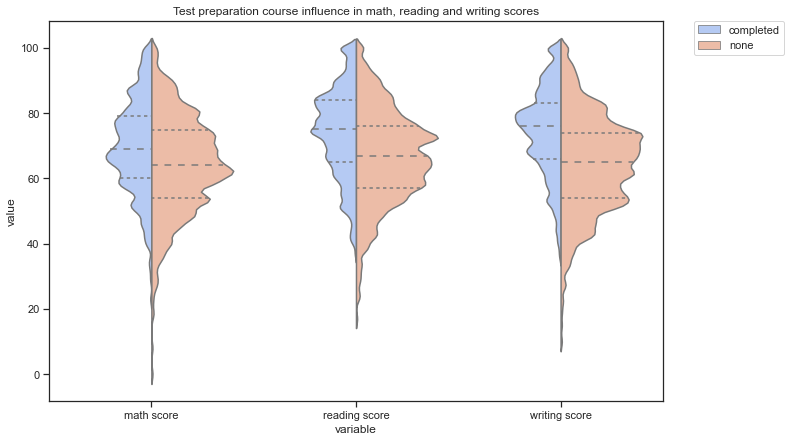

In [19]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 7))
plt.title('Test preparation course influence in math, reading and writing scores')
violin_gender = sns.violinplot(x="variable", y="value", hue="test preparation course",
                     data=dt_tmp, palette="coolwarm", split=True,
                     scale="count", inner="quartile", bw=.1)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

Students that have completed the test preparation course tend to score better on all three areas: math, reading and writing (seems reasonable, but never forget correlation does not imply causation!). Although records are very unbalanced: there are many more students who have not taken the course than those who have.

In [20]:
dt_tmp['test preparation course'].value_counts()

none         1926
completed    1074
Name: test preparation course, dtype: int64

There are almost twice as many students who have not completed the course.

### 2.1.4. Lunch Plan Influence <a class="anchor" id="lunch-plan-influence"></a>

In [21]:
dt_tmp = data_label_encoding[['math score', 'reading score', 'writing score', 'lunch']]
dt_tmp = dt_tmp.melt(id_vars = ['lunch'])

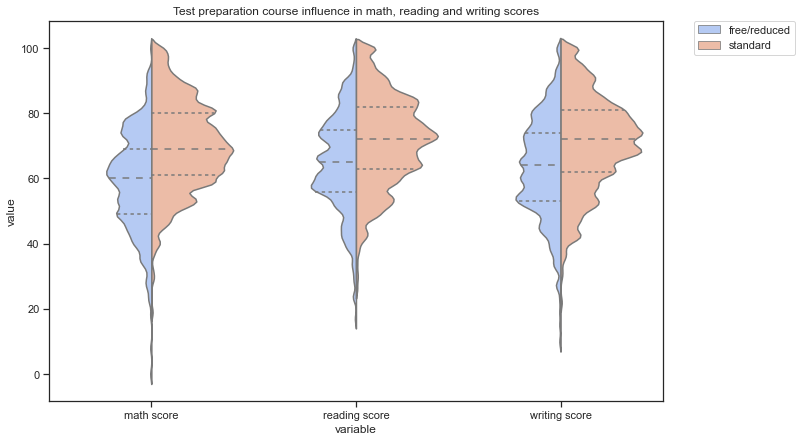

In [22]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 7))
plt.title('Test preparation course influence in math, reading and writing scores')
violin_gender = sns.violinplot(x="variable", y="value", hue="lunch",
                     data=dt_tmp, palette="coolwarm", split=True,
                     scale="count", inner="quartile", bw=.1)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [23]:
dt_tmp['lunch'].value_counts()

standard        1935
free/reduced    1065
Name: lunch, dtype: int64

As happens in course preparation, there's twice as many registers for standard lunch plan than for free/reduced. By the figures in the correlation matrix and the plots showed below this paragraph, we can observe that score median for all three areas is higher for thoose students with starndar lunch plan.

## 2.2 One-Hot Encoding <a class="anchor" id="one-hot-encoding"></a>

This approach consists in breaking each possible option of each categorical variable to features of value 1 or 0.

In [24]:
data_onehotencoding = data.copy()

In [25]:
data_onehotencoding = pd.get_dummies(data_onehotencoding, columns=['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course'])

Another option is to use function OneHotEncoder() from sklearn. I do prefer this approach cause it allows you to encode as many category columns as you want while the sklearn method one takes one at a time and it drops the columns name. I consider this option more user-friendly and easy to understand.

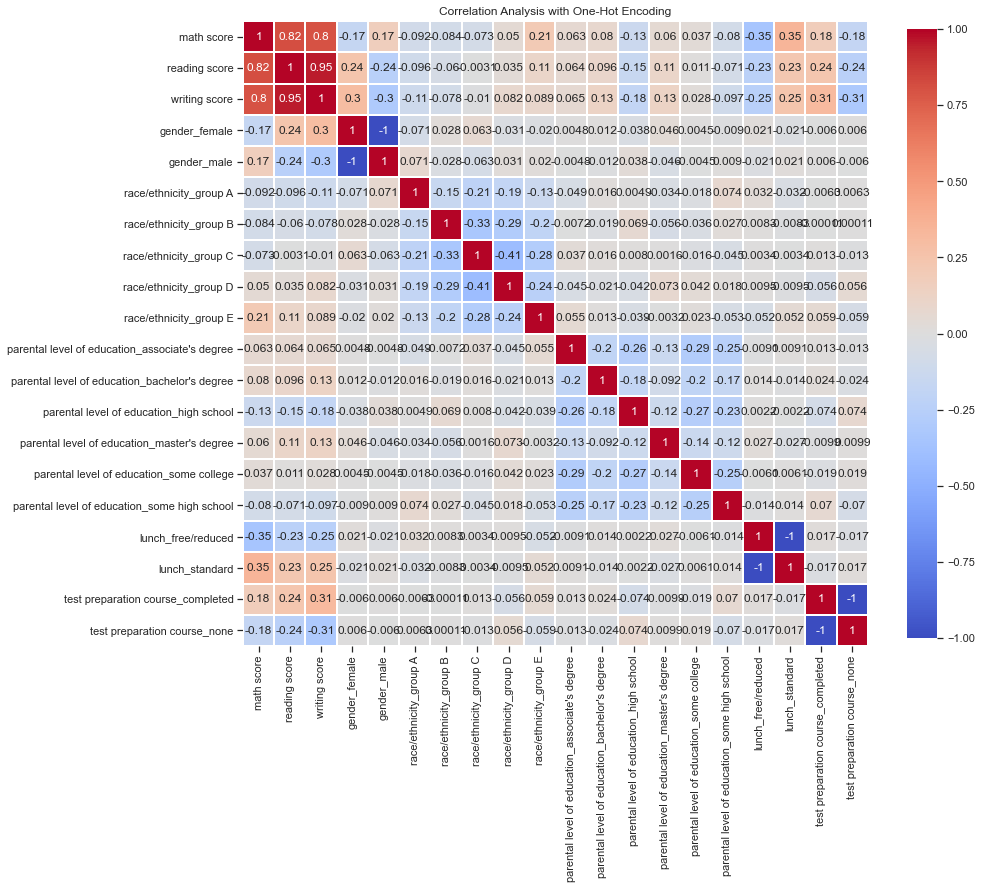

In [26]:
corr_label_encoding = data_onehotencoding.corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(14, 14))
plt.title('Correlation Analysis with One-Hot Encoding')
# Draw the heatmap with the mask and correct aspect ratio
ca = sns.heatmap(corr_label_encoding, cmap='coolwarm',center=0, vmin = -1,
            square=True, linewidths=1, cbar_kws={"shrink": .8}, annot = True)

I particularly like this method better because there is no place for misinterpretation caused by hierarchical number encoding. It also allows us to find relationships associated with one of the values of the category even if the category as a whole is unrelated.

One of the biggest disadvangates is the hard ingerpretation: when you have lots of variables with several distinct values it may result a nightmare.

For all variables that only have to disctinct possible values results will be the exact same as in Label Encoding method, so we will focus on those variables with several possible values: race/ethnicity and parental level of education.

### 2.2.1.  Broken Down Race/Ethnicity  <a class="anchor" id="broken-down-race-ethnicity"></a>

Breaking the Race/Ethnicity variable in 5 confirms our hypothesis from the previous section: the only group with some correlation is group E (a maybe a little bit group D), while the rest have hardly any relevance on the three scores.

In [27]:
dt_tmp = data_onehotencoding[['math score', 'reading score', 'writing score', 'race/ethnicity_group E']].copy()

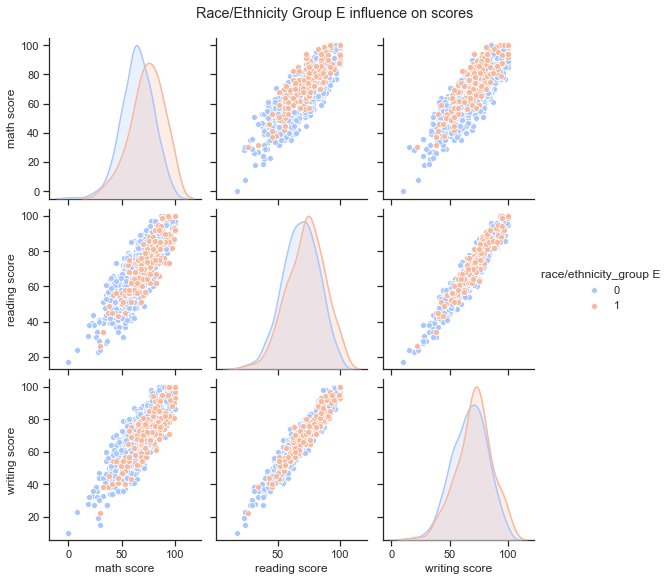

In [28]:
# Set up the matplotlib figure
sns.set(style="ticks", color_codes=True)
pairplot_group_E = sns.pairplot(hue='race/ethnicity_group E',data=dt_tmp, palette="coolwarm")
title = pairplot_group_E.fig.suptitle("Race/Ethnicity Group E influence on scores", y = 1.05)

The greatest relevance is found in the math score where we can see the center of the distribution is shifted to the right: people of group E race/ethnicity tend to score better in maths that those who don't belong to group E.

### 2.2.2. Broken Down Parental Education <a class="anchor" id="broken-down-parental-education"></a>

In this case the hot encoding reveals some very interesting insights: some parental education levels have an influence on reading and writing scores, while considerably less on mathematics.

The levels of parental Education that seem to influence the most are: high school and master's degree.

**- Parental Level of Education: High School**

In [29]:
dt_tmp = data_onehotencoding[['math score', 'reading score', 'writing score', "parental level of education_high school"]].copy()

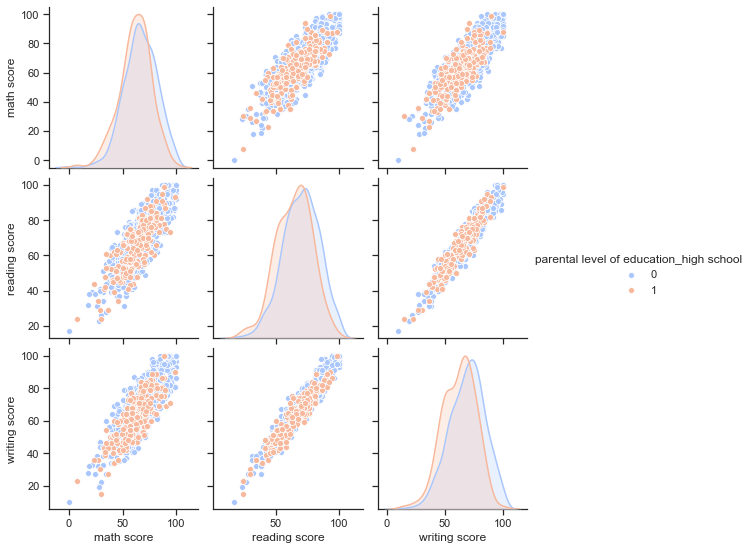

In [30]:
# Set up the matplotlib figure
sns.set(style="ticks", color_codes=True)
pairplot_bachelor = sns.pairplot(hue="parental level of education_high school",data=dt_tmp, palette="coolwarm")
title = pairplot_group_E.fig.suptitle("Parental level of education_high_school", y = 1.05)

Students whose parents have a high school education are more likely to get worse grades in all three subjects.

**- Parental Level of Education: Master's degree**

In [31]:
dt_tmp = data_onehotencoding[['math score', 'reading score', 'writing score', "parental level of education_master's degree"]].copy()

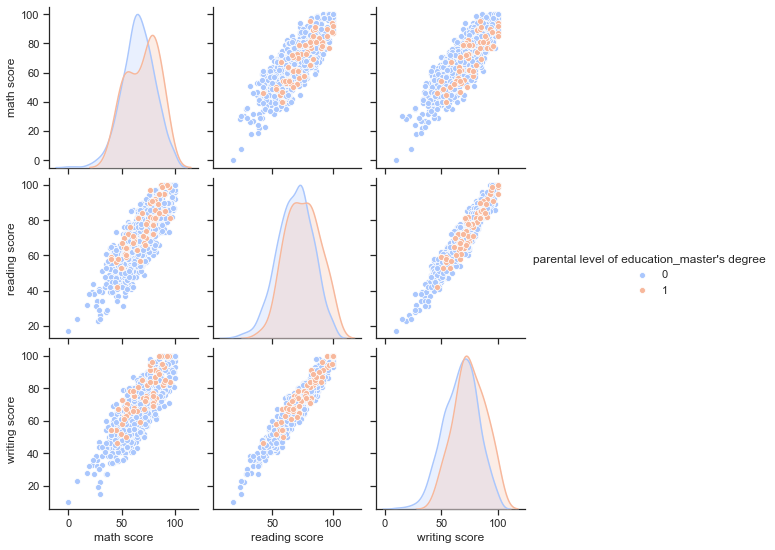

In [32]:
# Set up the matplotlib figure
sns.set(style="ticks", color_codes=True)
pairplot_bachelor = sns.pairplot(hue="parental level of education_master's degree",data=dt_tmp, palette="coolwarm")
title = pairplot_group_E.fig.suptitle("Parental level of education_master's degree influence on scores", y = 1.05)

The other way around happens for students whose parents have a master's degree education: they are more likely to score better in all three areas.

# 3. Bonus: Testing PPSCORE package <a class="anchor" id="third-bullet"></a>

In the words of the post writer: "the predictive power score is a normalized metric (**values range from 0 to 1**) that shows you to what extent you can use a variable X (say age) to predict a variable Y (say weight in kgs)."

Benefits:
- PPS also detects and summarizes non-linear relationships
- PPS is assymetric, so that it models Y ~ X, but not necessarily X ~ Y
- PPS can summarize predictive value of / among categorical variables and nominal data

Let's try it with our data:

In [33]:
# Reorder columns so we have scores in the same order as in section 2 and its easier to compare
data = data[['math score', 'reading score', 'writing score', 'gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course']]

In [34]:
ppmatrix = ppscore.matrix(data)

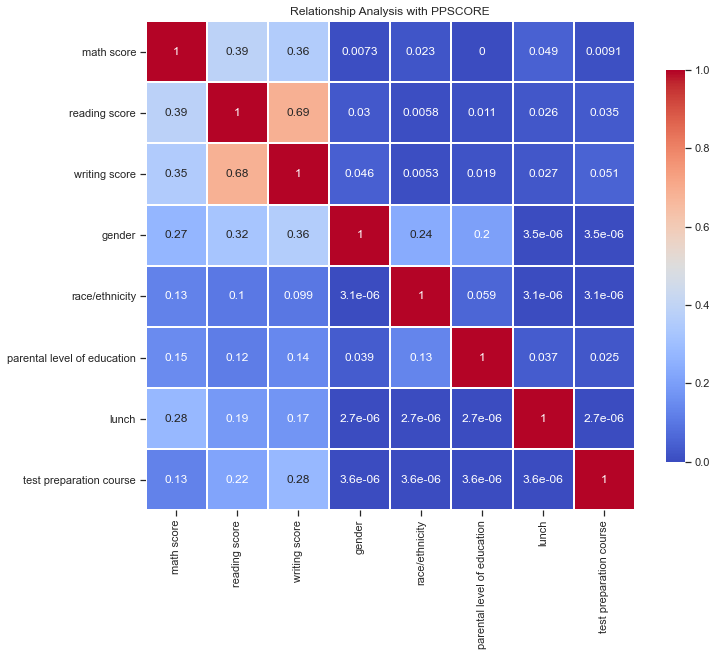

In [35]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
plt.title('Relationship Analysis with PPSCORE')

ra_ppscore = sns.heatmap(ppmatrix, vmin=0, vmax=1, cmap="coolwarm", linewidths=1, annot=True, 
            square = True, cbar_kws={"shrink": .8})

The first thing that stands out is that the PPS score between the math score and the reading and writing score is quite low. Remember we had correlation scores of 0.8 and 0.82 respectively for the two variables. Overall, most of the variables would not provide enough information to predict scores, except the reading with writing score and vice versa (but remember they are not symetric).

Why dont we quickly check? (really dummy experiment)

Let's try to predict math score with all the other variables in the dataframe:

In [36]:
X = data_label_encoding.drop(['math score', 'gender', 'race/ethnicity', 'parental level of education',
                             'lunch', 'test preparation course'], axis = 1)
y = data_label_encoding['math score']
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.33, random_state=42)

linearRegressor = linear_model.LinearRegression()
linearRegressor.fit(X_train, y_train)
y_predicted = linearRegressor.predict(X_test)

In [37]:
metrics.mean_squared_error(y_predicted, y_test)

30.774583234525572

Well yeah, result is pretty awful.

And what about trying to predict writing score just with reading score?

In [38]:
X = data_label_encoding['reading score'].values
y = data_label_encoding['writing score'].values
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.33, random_state=42)

linearRegressor = linear_model.LinearRegression()
linearRegressor.fit(X_train.reshape(-1, 1) , y_train.reshape(-1, 1) )
y_predicted = linearRegressor.predict(X_test.reshape(-1, 1) )

In [39]:
metrics.mean_squared_error(y_predicted, y_test)

22.073317824249827

Slightly better as the PPS score predicted... but anyways, quite awful too.

Sadly, for this dataset PPS score has not revealed any decisive variable for predicting all three scores: math, reading and writing.

# 4. Conclusions <a class="anchor" id="fourth-bullet"></a>

As shown in prev graphs, the highest correlation between variables / features are:
- Writing score and Gender (also Math and Reading but slightly smaller)
- Race/Ethnicity group E and Math Score
- Parental Level of Education High School with Writing and Reading Scores
- Lunch plan and Math Score (also and Reading and Writing but slightly smaller)
- Test preparation course and Writing and Reading Score (also Math but slightly smaller)